In [1]:
#import my Peceptron class from my peceptron.py algorithm
from peceptron import Perceptron

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
v1 = np.array([1, 2, 3])
v2 = 0.5*v1

In [4]:
np.linalg.norm(v1)

3.7416573867739413

In [5]:
np.linalg.norm(v2)

1.8708286933869707

In [6]:
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

In [7]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
s

'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [8]:
df = pd.read_csv(s, header=None, encoding='utf-8')

In [9]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [11]:
# extract sepal length and petal length
x = df.iloc[0:100, [0, 2]].values

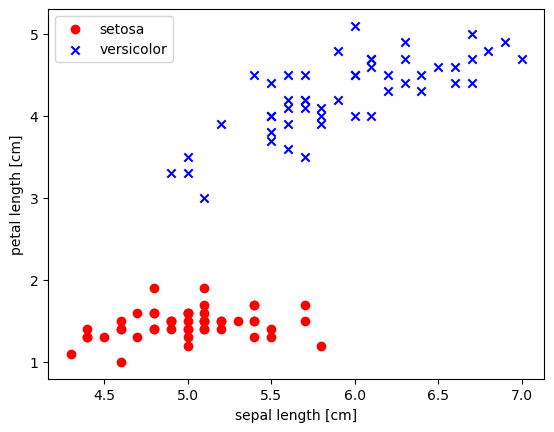

In [12]:
#plot data
pos = y==1
neg = y==-1
plt.scatter(x[neg, 0], x[neg, 1], c='red', marker='o', label='setosa')
plt.scatter(x[pos, 0], x[pos, 1], c='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

Text(0, 0.5, 'Number of updates')

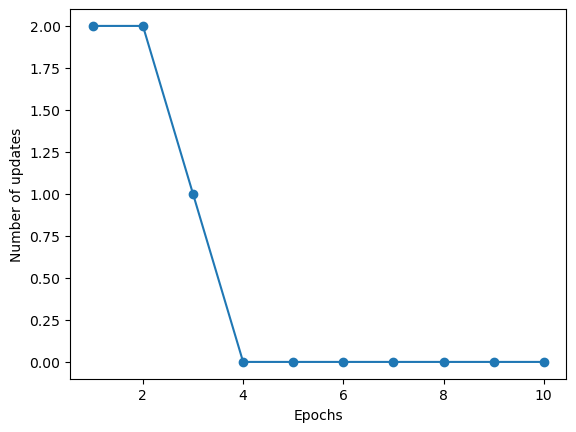

In [13]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(x, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

In [14]:
#import my plot_decision_regions methode from my peceptron.py algorithm
from peceptron import plot_decision_regions

C:\Users\steph\OneDrive\Bureau\ML\Practice\_Peceptron algorithm\peceptron.py:253: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = x[y == c1, 0], y = x[y == c1, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=c1, edgecolor='black')


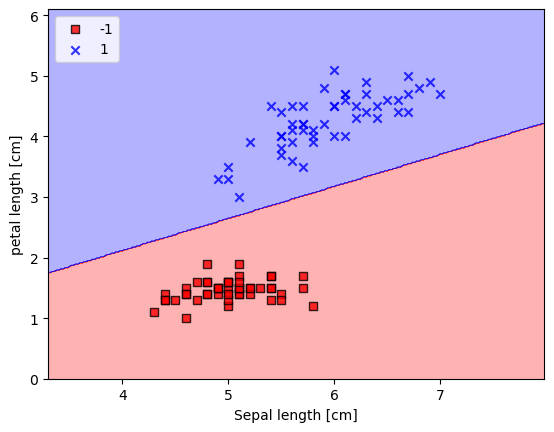

In [15]:
plot_decision_regions(x, y, classifier=ppn)
plt.xlabel("Sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.show()

In [16]:
#import my AdalineGD class from my peceptron.py algorithm
from peceptron import AdalineGD

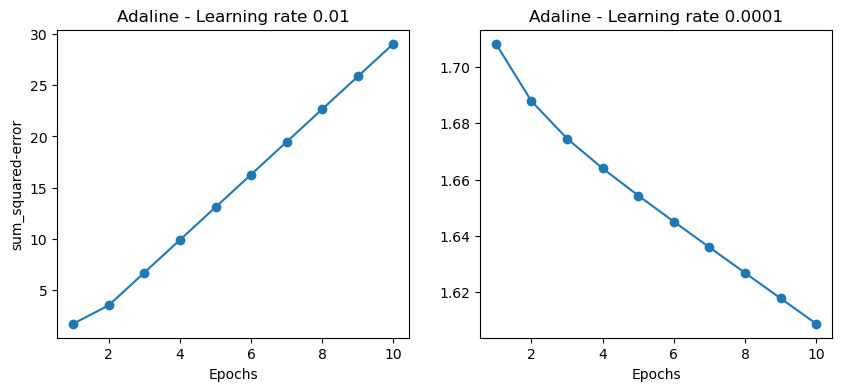

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(x, y)

ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel("log(sum_squared-error)")
ax[0].set_title("Adaline - Learning rate 0.01")

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(x, y)

ax[1].plot(range(1, len(ada2.cost_)+1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[0].set_ylabel("sum_squared-error")
ax[1].set_title("Adaline - Learning rate 0.0001")

plt.show()

In [18]:
#Standardization
x_std = np.copy(x)
x_std[:, 0] = (x[:,0] - x[:,0].mean())/x[:,0].std()
x_std[:, 1] = (x[:,1] - x[:,1].mean())/x[:,1].std()

In [19]:
x_std[:10, :]

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952],
       [-0.11120129, -0.80621461],
       [-1.36417359, -1.01435952],
       [-0.73768744, -0.94497788],
       [-1.67741667, -1.01435952],
       [-0.89430898, -0.94497788]])

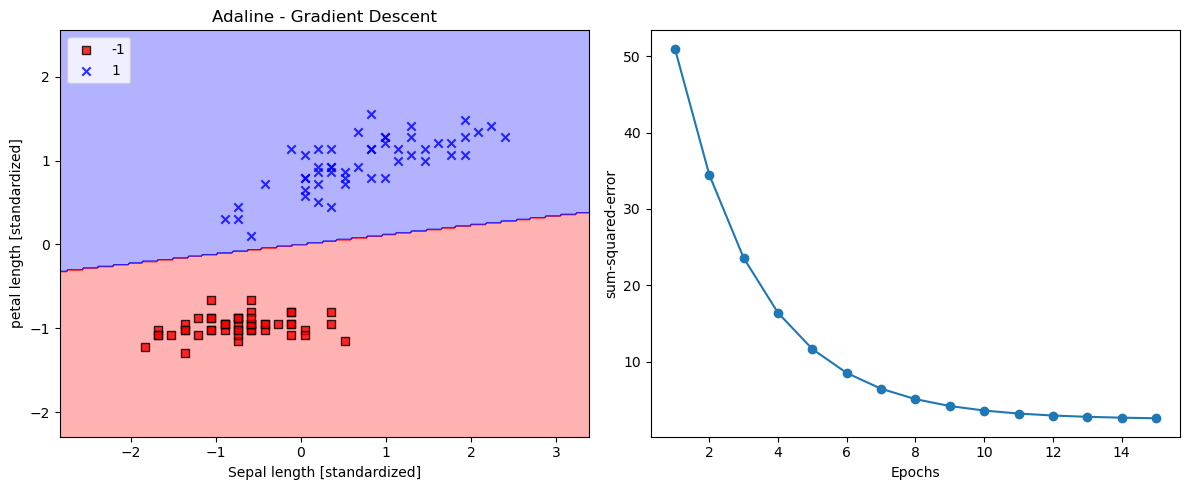

In [20]:
#Traning 
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(x_std, y)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_decision_regions(x_std, y, classifier=ada_gd)
plt.title("Adaline - Gradient Descent")
plt.xlabel("Sepal length [standardized]")
plt.ylabel("petal length [standardized]")
plt.legend(loc='upper left')
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(range(1, len(ada_gd.cost_)+1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('sum-squared-error')
plt.tight_layout()

plt.show()

In [21]:
from peceptron import AdalineSGB

In [22]:
ada_sgd = AdalineSGB(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(x_std, y)

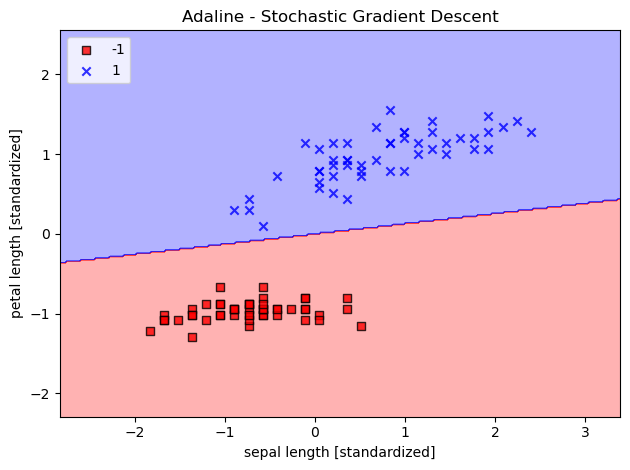

In [32]:
plot_decision_regions(x_std, y, classifier=ada_sgd)
plt.title("Adaline - Stochastic Gradient Descent")
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


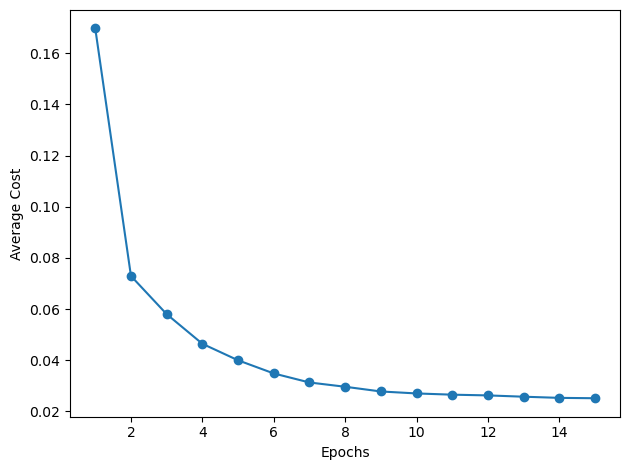

In [33]:
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()